# **Project 17: Petrol Price Predictor**

***Pandas*** : *A powerful Python library for data manipulation and analysis, providing data structures like DataFrames.*

***NumPy*** : *A fundamental Python library for numerical computing, offering support for large multi-dimensional arrays and matrices.*

***Matplotlib*** : *A comprehensive library for creating static, animated, and interactive visualizations in Python.*

***Seaborn*** : *A Python data visualization library based on Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.*

***Warnings*** : *A module in Python for issuing warning messages to alert developers about potential issues or deprecated features in their code.*

# **Data Loading**

**We Import these modules for Data Loading, Data Cleaning and Data Visualization.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**warnings.simplefilter("ignore"): A command to suppress all warning messages in Python, making the code run without displaying any warnings.**

In [2]:
warnings.simplefilter("ignore")

**df = pd.read_csv("/content/Petrol - train_data.csv"): A command to read a CSV file named "Petrol - train_data.csv" into a Pandas DataFrame.**

**df.head(5): A command to display the first five rows of the DataFrame df.**

In [3]:
df = pd.read_csv("/content/Petrol - train_data.csv")
df.head(5)

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**df1 = pd.read_csv("/content/Petrol - test_data.csv"): Reads the CSV file "Petrol - test_data.csv" into a Pandas DataFrame.**

**df1.head(5): Displays the first five rows of the DataFrame df1.**

In [4]:
df1 = pd.read_csv("/content/Petrol - test_data.csv")
df1.head(5)

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


# **Data Cleaning**

**df1 = df1.drop(['Prediction'], axis=1): Drops the 'Prediction' column from the DataFrame df1.**

**df1.head(5): Displays the first five rows of the modified DataFrame df1.**

In [5]:
df1 = df1.drop(['Prediction'], axis=1)
df1.head(5)

,Date
0,1/1/2019
1,1/2/2019
2,1/3/2019
3,1/4/2019
4,1/5/2019


**df = pd.concat([df, df1], axis=0): Concatenates (appends) the DataFrame df1 to df along the rows (axis=0).**

**df.head(5): Displays the first five rows of the combined DataFrame df.**

In [6]:
df = pd.concat([df, df1], axis=0)
df.head(5)

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**df.rename(columns={"Petrol (USD)": "Petrol"}, inplace=True): Renames the column "Petrol (USD)" to "Petrol" in the DataFrame df.**

**df.head(5): Displays the first five rows of the DataFrame df after renaming the column.**

In [7]:
df.rename(columns = {"Petrol (USD)" : "Petrol"}, inplace=True)
df.head(5)

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**df.isnull().sum(): Counts and displays the number of missing values (NaN) in each column of the DataFrame df.**

In [8]:
df.isnull().sum()

,0
Date,0
Petrol,18


**he code uses SimpleImputer to fill missing values in the "Petrol" column of df with the column's mean and then checks for any remaining missing values in the DataFrame.**

In [9]:
from sklearn.impute import SimpleImputer

Impute = SimpleImputer(strategy = "mean")

df["Petrol"] = Impute.fit_transform(df[["Petrol"]])

df.isnull().sum()

,0
Date,0
Petrol,0


**plt.scatter(df.Date, df.Petrol, color='red', label='Prices', s=50): Creates a scatter plot showing the relationship between 'Date' and 'Petrol' columns from DataFrame df, with red dots representing prices and size of markers set to 50.**

**Here we can observe a significant gradual increase in the inflation rate of prices over time, with noticeable outliers present in the graph as well.**

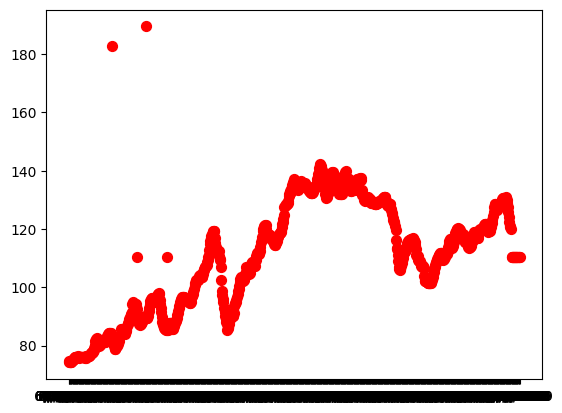

In [10]:
plt.scatter(df.Date, df.Petrol,color='red',label='Prices', s=50)

**Filtering Data: Selecting data points where the 'Petrol' column values are less than 750 from DataFrame df.**

**Visualization: Creating a scatter plot using matplotlib (plt.scatter) to show how 'Petrol' prices ('Prices') vary over time ('Date'), represented in red with a marker size of 50.**

**Here, we remove outliers by setting the petrol limit to 750.**

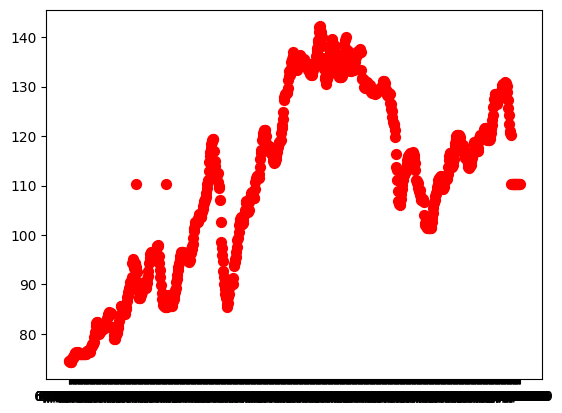

In [11]:
df = df[df.Petrol < 160]
plt.scatter(df.Date, df.Petrol,color='red',label='Prices', s=50)

**This will return a list or an index object containing the names of all columns in your DataFrame df.**

In [12]:
df.columns

Index(['Date', 'Petrol'], dtype='object')

**This code will convert the 'Date' column to datetime format using the specified format %m/%d/%Y (assuming the date format is month/day/year). It then creates new columns 'Month', 'Day', and 'Year' based on the datetime components extracted from the 'Date' column.**

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['Month'] = df['Date'].dt.month
df['Day'] = df["Date"].dt.day
df['Year'] = df['Date'].dt.year

df.head(5)

,Date,Petrol,Month,Day,Year
0,2003-06-09,74.59,6,9,2003
1,2003-06-16,74.47,6,16,2003
2,2003-06-23,74.42,6,23,2003
3,2003-06-30,74.35,6,30,2003
4,2003-07-07,74.28,7,7,2003


**This code drops the column 'Date' from the DataFrame "df".**

In [14]:
df = df.drop(['Date'], axis=1)

# **Model Building**

**These lines create two new DataFrames: X containing columns 'Month', 'Day', and 'Year' from df, and y containing the 'Petrol' column from df.**

In [15]:
X = df[["Month", "Day", "Year"]]
y = df[["Petrol"]]

**This code snippet now correctly scales the features (X) and the target (y) using MinMaxScaler.**

In [16]:
from sklearn.preprocessing import MinMaxScaler

Scaler_X = MinMaxScaler().set_output(transform='pandas')

X = Scaler_X.fit_transform(X)

Scaler_y = MinMaxScaler().set_output(transform='pandas')

y = Scaler_y.fit_transform(y)

**These imports are used for splitting data into training and testing sets and for evaluating regression models using mean squared error.**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**This line of code splits the features (X) and target (y) into training and testing sets using a train size of 80%.**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

**1: Initialize a Linear Regression model (LR) with fit_intercept=True, meaning intercept term is added.**

**2: Train the model (LR.fit(X_train, y_train)) using the training data (X_train, y_train).**

**3: Generate predictions (y_pred) for the test data (X_test) using LR.predict(X_test).**

**4: Calculate Mean Squared Error (MSE) (mean_squared_error(y_test, y_pred)) to assess prediction accuracy.**

In [24]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Linear Regression Mean Squared Error: ", MSE)

Linear Regression Mean Squared Error:  0.03700756039106601


**1: Initialize a Random Forest Regressor (RFR) with parameters max_depth=20 and min_samples_split=5.**

**2: Train the Random Forest Regressor (RFR.fit(X_train, y_train)) using the training data (X_train, y_train).**

**3: Generate predictions (y_pred) for the test data (X_test) using RFR.predict(X_test).**

**4: Calculate Mean Squared Error (MSE) (mean_squared_error(y_test, y_pred)) to evaluate the model's performance on the test data.**

In [25]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(max_depth=20, min_samples_split=5)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Random Forest Mean Squared Error: ", MSE)

Random Forest Mean Squared Error:  0.001212526809636878


**1: Initialize a Decision Tree Regressor (DTR) with parameters max_depth=5 and max_leaf_nodes=10.**

**2: Train the Decision Tree Regressor (DTR.fit(X_train, y_train)) using the training data (X_train, y_train).**

**3: Generate predictions (y_pred) for the test data (X_test) using DTR.predict(X_test).**

**4: Calculate Mean Squared Error (MSE) (mean_squared_error(y_test, y_pred)) to evaluate the model's performance on the test data.**

In [26]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10)

DTR.fit(X_train, y_train)

y_pred = DTR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Decision Tree Mean Squared Error: ", MSE)

Decision Tree Mean Squared Error:  0.0058711777987766394


**1: Initialize a Lasso Regression model (Ls) with regularization parameter alpha=1.0.**

**2: Train the Lasso Regression model (Ls.fit(X_train, y_train)) using the training data (X_train, y_train).**

**3: Generate predictions (y_pred) for the test data (X_test) using Ls.predict(X_test).**

**4: Calculate Mean Squared Error (MSE) (mean_squared_error(y_test, y_pred)) to evaluate the model's performance on the test data.**

In [27]:
from sklearn.linear_model import Lasso

Ls = Lasso(alpha=1.0)

Ls.fit(X_train, y_train)

y_pred = Ls.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)

print("Lasso Regression Mean Squared Error: ", MSE)

Lasso Regression Mean Squared Error:  0.07690275872153045


# **Conclusion:**

**Based on the mean squared error (MSE) values you provided:**

- **Linear Regression: 0.03700**
- **Random Forest Regression: 0.0012**
- **Decision Tree Regression: 0.0058**
- **Lasso Regression: 0.0769**

**It's clear that the Random Forest Regression (RFR) has the lowest MSE among the models you've evaluated (0.0012). A lower MSE generally indicates better predictive performance, suggesting that the Random Forest model is performing the best among the models tested in terms of accuracy in predicting flight prices.**

**Therefore, based on MSE alone, the Random Forest Regressor appears to be the most suitable model for your prediction task compared to Linear Regression, Decision Tree Regression, and Lasso Regression.**

# **Save Model**

**1: Import pickle: Import the pickle module, which allows you to serialize Python objects to disk and load them back into memory.**

**2: Save the model: Use pickle.dump() to serialize and save the RFR model to a file named "Finalized-Model.pickle" in binary write mode ("wb").**

**3: This line opens a file named Scaler_X.pickle in write-binary mode and saves (serializes) the Scaler_X object into it using pickle so it can be reused later.**

In [29]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
  pickle.dump(RFR, file)

with open("Scaler_X.pickle", "wb") as file:
  pickle.dump(Scaler_X, file)